In [ ]:
##### Good job!

### Scraping MLB stats from ESPN go###

In this homework we will try to analyze the batting performances of different teams in Major League Baseball using the data available in the following link http://espn.go.com/mlb/stats/team/_/stat/batting 

We will first scrape the page corresponding to the 2018 season 

In [59]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2018"

We will now scrape the table found in the above link. You can follow the class notebook to understand how to capture html table tags.

Q1) Write a function which will take the above url and return a pandas dataframe corresponding to the table found in the given link. 

In [60]:
import requests
import lxml.html as lh

page = requests.get(url)
doc = lh.fromstring(page.content)
page.content[:500]

b'\n<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml">\n<head><script src="http://cdn.espn.com/sports/optimizely/js"></script>\n\n<script>\n(function redirectToHttpIfHttps() {\n   var win      = typeof window !== \'undefined\' && window,\n       location = win && win.location,\n       protocol = location && location.protocol;\n\n   if (protocol === \'https:\') {\n        location.href = location.href.replace(\'https://\', \'http://\');\n   }\n})();\n</script><meta charset="iso-8859-1">\n<meta http-equiv'

In [72]:
#print html to visualize <tr > </tr>
from lxml import etree, html

print(etree.tostring(lh.fromstring(page.content), encoding='unicode', pretty_print=True))

<html xmlns:fb="http://www.facebook.com/2008/fbml">
<head><script src="http://cdn.espn.com/sports/optimizely/js"/>

<script>
(function redirectToHttpIfHttps() {
   var win      = typeof window !== 'undefined' &amp;&amp; window,
       location = win &amp;&amp; win.location,
       protocol = location &amp;&amp; location.protocol;

   if (protocol === 'https:') {
        location.href = location.href.replace('https://', 'http://');
   }
})();
</script><meta charset="iso-8859-1"/>
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>
<link rel="icon" sizes="any" mask="" href="http://a.espncdn.com/favicon.ico"/>
<meta name="theme-color" content="#CC0000"/>
<script type="text/javascript">
    if(true &amp;&amp; navigator &amp;&amp; navigator.userAgent.toLowerCase().indexOf("teamstream") &gt;= 0) {
        window.location = 'http://m.espn.com/mobilecache/general/apps/sc';
    }
</script><title>2018 MLB Team Batting Stats - Major League Baseball - ESPN</title>
<meta name="google-si

In [73]:
tr_elements = doc.xpath('//tr')
','.join([str(len(T)) for T in tr_elements[:]])

'1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,14,14,14,14'

In [95]:
T=tr_elements[2]
i=0;
for t in T.iterchildren():
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))

1:"1"
2:"Boston"
3:"162"
4:"5623"
5:"876"
6:"1509"
7:"355"
8:"31"
9:"208"
10:"2550"
11:"829"
12:".268"
13:".339"
14:".453"
15:".792"


In [96]:
col=[]  # collect column names into col
T=tr_elements[1]
print(type(T))
i=0
print(len(T))
for t in T.iterchildren():
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

print('the columns are:',col)

<class 'lxml.html.HtmlElement'>
15
1:"RK"
2:"TEAM"
3:"GP"
4:"AB"
5:"R"
6:"H"
7:"2B"
8:"3B"
9:"HR"
10:"TB"
11:"RBI"
12:"AVG"
13:"OBP"
14:"SLG"
15:"OPS"
the columns are: [('RK', []), ('TEAM', []), ('GP', []), ('AB', []), ('R', []), ('H', []), ('2B', []), ('3B', []), ('HR', []), ('TB', []), ('RBI', []), ('AVG', []), ('OBP', []), ('SLG', []), ('OPS', [])]


In [97]:
format=[int,str,int,int,int,int,int,int,int,int,int,float,float,float,float]
print(len(format))
format[1]('this')

15


'this'

In [98]:
#30	Atlanta	162	5420	573	1361	251	18	100	1948	548	.251	.314	.359	.674
for j in range(2,len(tr_elements)):
    T=tr_elements[j]
    if len(T)!=15:
        print('break')
        break
    i=0
    for t in T.iterchildren():
        data=t.text_content()
        try:      
            data=format[i](data)
        except:
            print(data,'cannot be converted to float, row,col=',j,i)
            data=None
        col[i][1].append(data)
        if i==1:
            print(data)
        i+=1

Boston
NY Yankees
Cleveland
Oakland
LA Dodgers
Houston
Colorado
Washington
Chicago Cubs
Atlanta
St. Louis
Milwaukee
Minnesota
Texas
LA Angels
Tampa Bay
Toronto
Cincinnati
Arizona
Pittsburgh
Seattle
Philadelphia
NY Mets
Chicago Sox
Kansas City
Detroit
Baltimore
San Diego
San Francisco
Miami
break


In [101]:
col[6][1]

[355,
 269,
 297,
 322,
 296,
 278,
 280,
 284,
 286,
 314,
 248,
 252,
 317,
 266,
 249,
 274,
 320,
 251,
 259,
 290,
 256,
 241,
 265,
 259,
 283,
 284,
 242,
 250,
 255,
 222]

In [103]:
[len(c[1]) for c in col]

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]

In [117]:
import requests
import lxml.html as lh
import pandas as pd

def SCRAPE_ESPN_MLB_STATS(url):
    
    #get page's html contents and convert to string
    page = requests.get(url)
    doc = lh.fromstring(page.content)

    #find table rows
    tr_elements = doc.xpath('//tr')

    # collect column names into col
    col=[]  
    T=tr_elements[1]
    i=0
    for t in T.iterchildren():
        i+=1
        name=t.text_content()
        col.append((name,[]))

    #define format for each data that list, each list will become a column in the dataframe
    format=[int,str,int,int,int,int,int,int,int,int,int,float,float,float,float]

    #fill every list with data and make sure data type is preserved
    for j in range(2,len(tr_elements)):
        T=tr_elements[j]
        if len(T)!=15:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            try:      
                data=format[i](data)
            except:
                print(data,'cannot be converted to float, row,col=',j,i)
                data=None
            col[i][1].append(data)
            i+=1

    #create dataframe with list of tuples
    df = pd.DataFrame.from_dict(dict(col)) 

    return df

Run the above function to scrape season 2018 stats.

In [118]:
df_2018 = SCRAPE_ESPN_MLB_STATS(url)
df_2018

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,Boston,162,5623,876,1509,355,31,208,2550,829,0.268,0.339,0.453,0.792
1,2,NY Yankees,162,5515,851,1374,269,23,267,2490,821,0.249,0.329,0.451,0.781
2,3,Cleveland,162,5595,818,1447,297,19,216,2430,786,0.259,0.332,0.434,0.766
3,4,Oakland,162,5579,813,1407,322,20,227,2450,778,0.252,0.325,0.439,0.764
4,5,LA Dodgers,163,5572,804,1394,296,33,235,2461,756,0.250,0.333,0.442,0.774
5,6,Houston,162,5453,797,1390,278,18,205,2319,763,0.255,0.329,0.425,0.754
6,7,Colorado,163,5541,780,1418,280,42,210,2412,748,0.256,0.322,0.435,0.757
7,8,Washington,162,5517,771,1402,284,25,191,2309,737,0.254,0.335,0.419,0.753
8,9,Chicago Cubs,163,5624,761,1453,286,34,167,2308,722,0.258,0.333,0.410,0.744
9,10,Atlanta,162,5582,759,1433,314,29,175,2330,717,0.257,0.324,0.417,0.742


We will now produce plots analyzing performance of different teams on different statistical parameters

Q2) Write a function which will take the above dataframe and a list of column names as input and produces a set of plots corresponding to each of the column names provided

In [138]:
import matplotlib.pyplot as plt

def produce_plots(df, col_names):
    for col in col_names:
        df = df.sort_values(col)
        df.plot('TEAM', col, kind='barh', figsize=(20,10))
        plt.show()

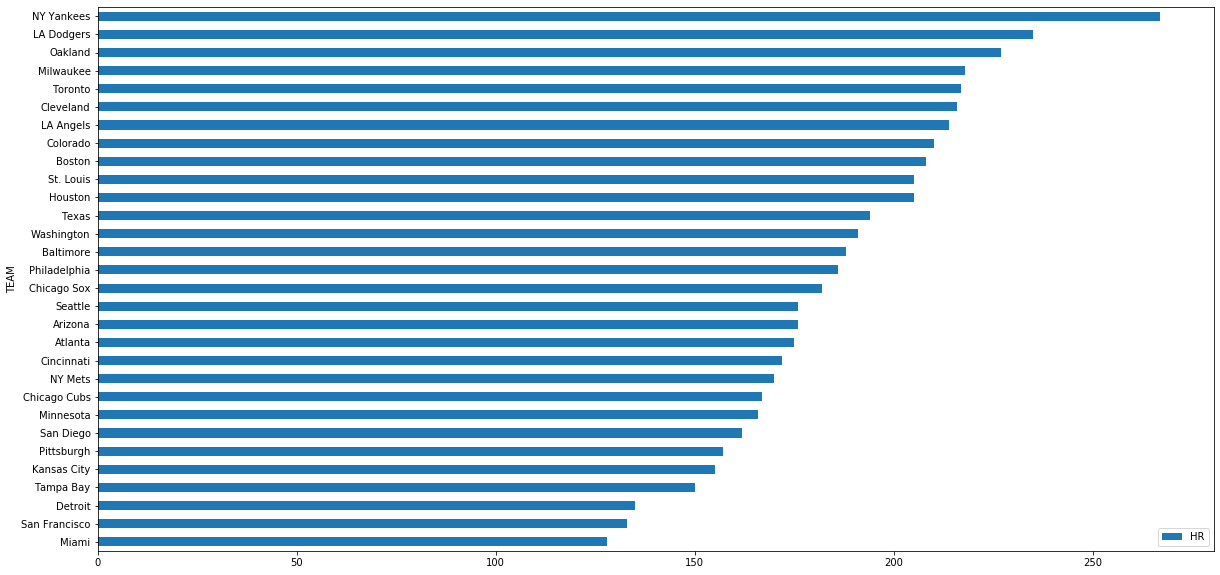

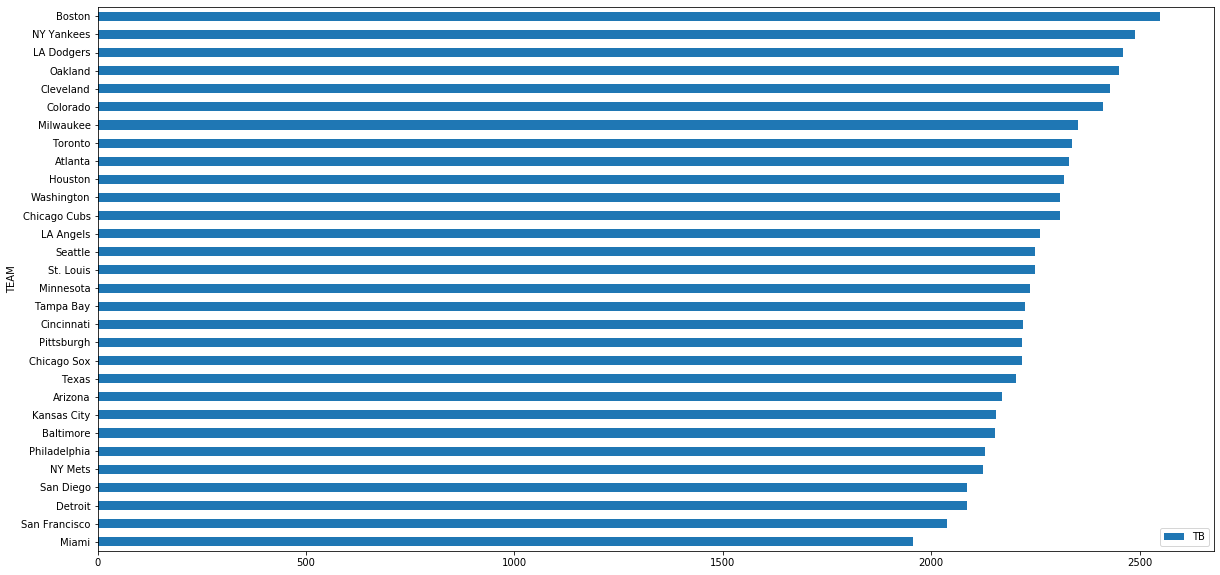

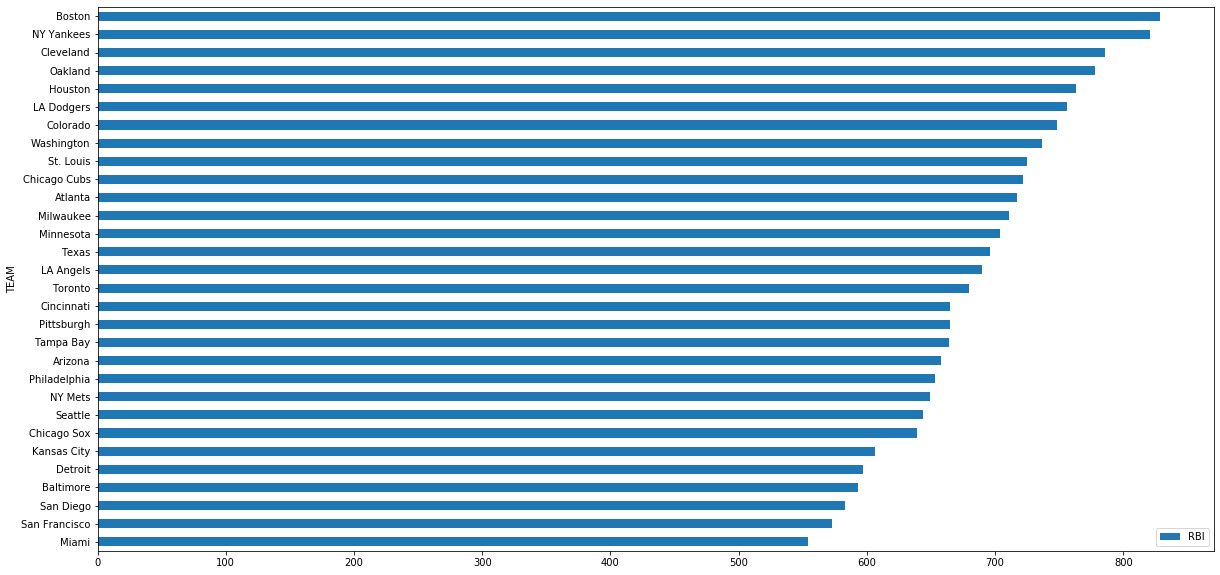

In [139]:
#test produce_plots

col_names = ['HR','TB','RBI']
produce_plots(df_2018, col_names)

Call the above function for the columns

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

Q3) We will now use the above functions to scrape for more seasons and analyze the performances over a period of 6 years from 2013-2018

In [155]:
#get all data into a single dataframe
dfs={}
for year in range(3,9):
    
    #get url
    link = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/201'+str(year)
    
    #add year to each dataframe
    df_temp=SCRAPE_ESPN_MLB_STATS(link)
    df_temp['Year'] = '201'+str(year)
    
    #get all dataframes in a dictionary
    dfs[year]=df_temp

#concatenate all dataframes inside dictionary into a single one
dfs_agg = pd.concat(dfs.values(), ignore_index=True)

Inorder to analyze performance of teams across seasons, we will need all the data in a single dataframe. 

Q4) Use appropriate pandas functions to combine the above dictionary of year:dataframe to produce one dataframe which has a new column corresponding to the year/season 

In [156]:
#combine dfs dictionary with a new column for year

#finished above
combined_df = dfs_agg 
combined_df

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS,Year
0,1,Boston,162,5651,853,1566,363,29,178,2521,819,0.277,0.349,0.446,0.795,2013
1,2,Detroit,162,5735,796,1625,292,23,176,2491,767,0.283,0.346,0.434,0.780,2013
2,3,St. Louis,162,5557,783,1494,322,20,125,2231,745,0.269,0.332,0.401,0.733,2013
3,4,Oakland,162,5521,767,1403,301,25,186,2312,725,0.254,0.327,0.419,0.745,2013
4,5,Baltimore,162,5620,745,1460,298,14,212,2422,719,0.260,0.313,0.431,0.744,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,26,Detroit,162,5494,630,1326,284,35,135,2085,597,0.241,0.300,0.380,0.680,2018
176,27,Baltimore,162,5507,622,1317,242,15,188,2153,593,0.239,0.298,0.391,0.689,2018
177,28,San Diego,162,5486,617,1289,250,30,162,2085,583,0.235,0.297,0.380,0.677,2018
178,29,San Francisco,162,5541,603,1324,255,30,133,2038,573,0.239,0.300,0.368,0.667,2018


Q5) Now write a function which will take the above dataframe and a list of column names and produces a set of plots corresponding to each of the columns provided. Each plot is a set of subplots, where every subplot is a line graph of the column values over the 6 years for each of the teams in the dataframe.

In [247]:
import matplotlib.pyplot as plt

def produce_plots_over_seasons(combined_df, col_names):
    
    #loop over every column name
    for col in col_names:
        
        #define figure for each column
        fig = plt.figure(figsize = (30,25))
        fig.suptitle('Y-axis = '+col, fontsize=30)
        
        i = 1 #index for each team subplot
        
        #loop over every team
        for team in list(np.unique(df.TEAM)):
            
            #define sub-dataframe and sort by year
            df_team = df[df.TEAM == team]
            df_team = df_team.sort_values('Year')
            
            #add subplots to axis, add title, and change axis labels size
            ax = fig.add_subplot(6,5,i)
            ax.plot(df_team.Year, df_team[col],'--bo')
            ax.set_title(team,fontsize=24)
            ax.tick_params(axis='both', which='major', labelsize=18)
            
            i+=1 #increase subplot index
    
        #show plots
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

Call the above function for the columns 

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

In [244]:
#prevent jupyter notebook from creating auto scrolling window

In [245]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

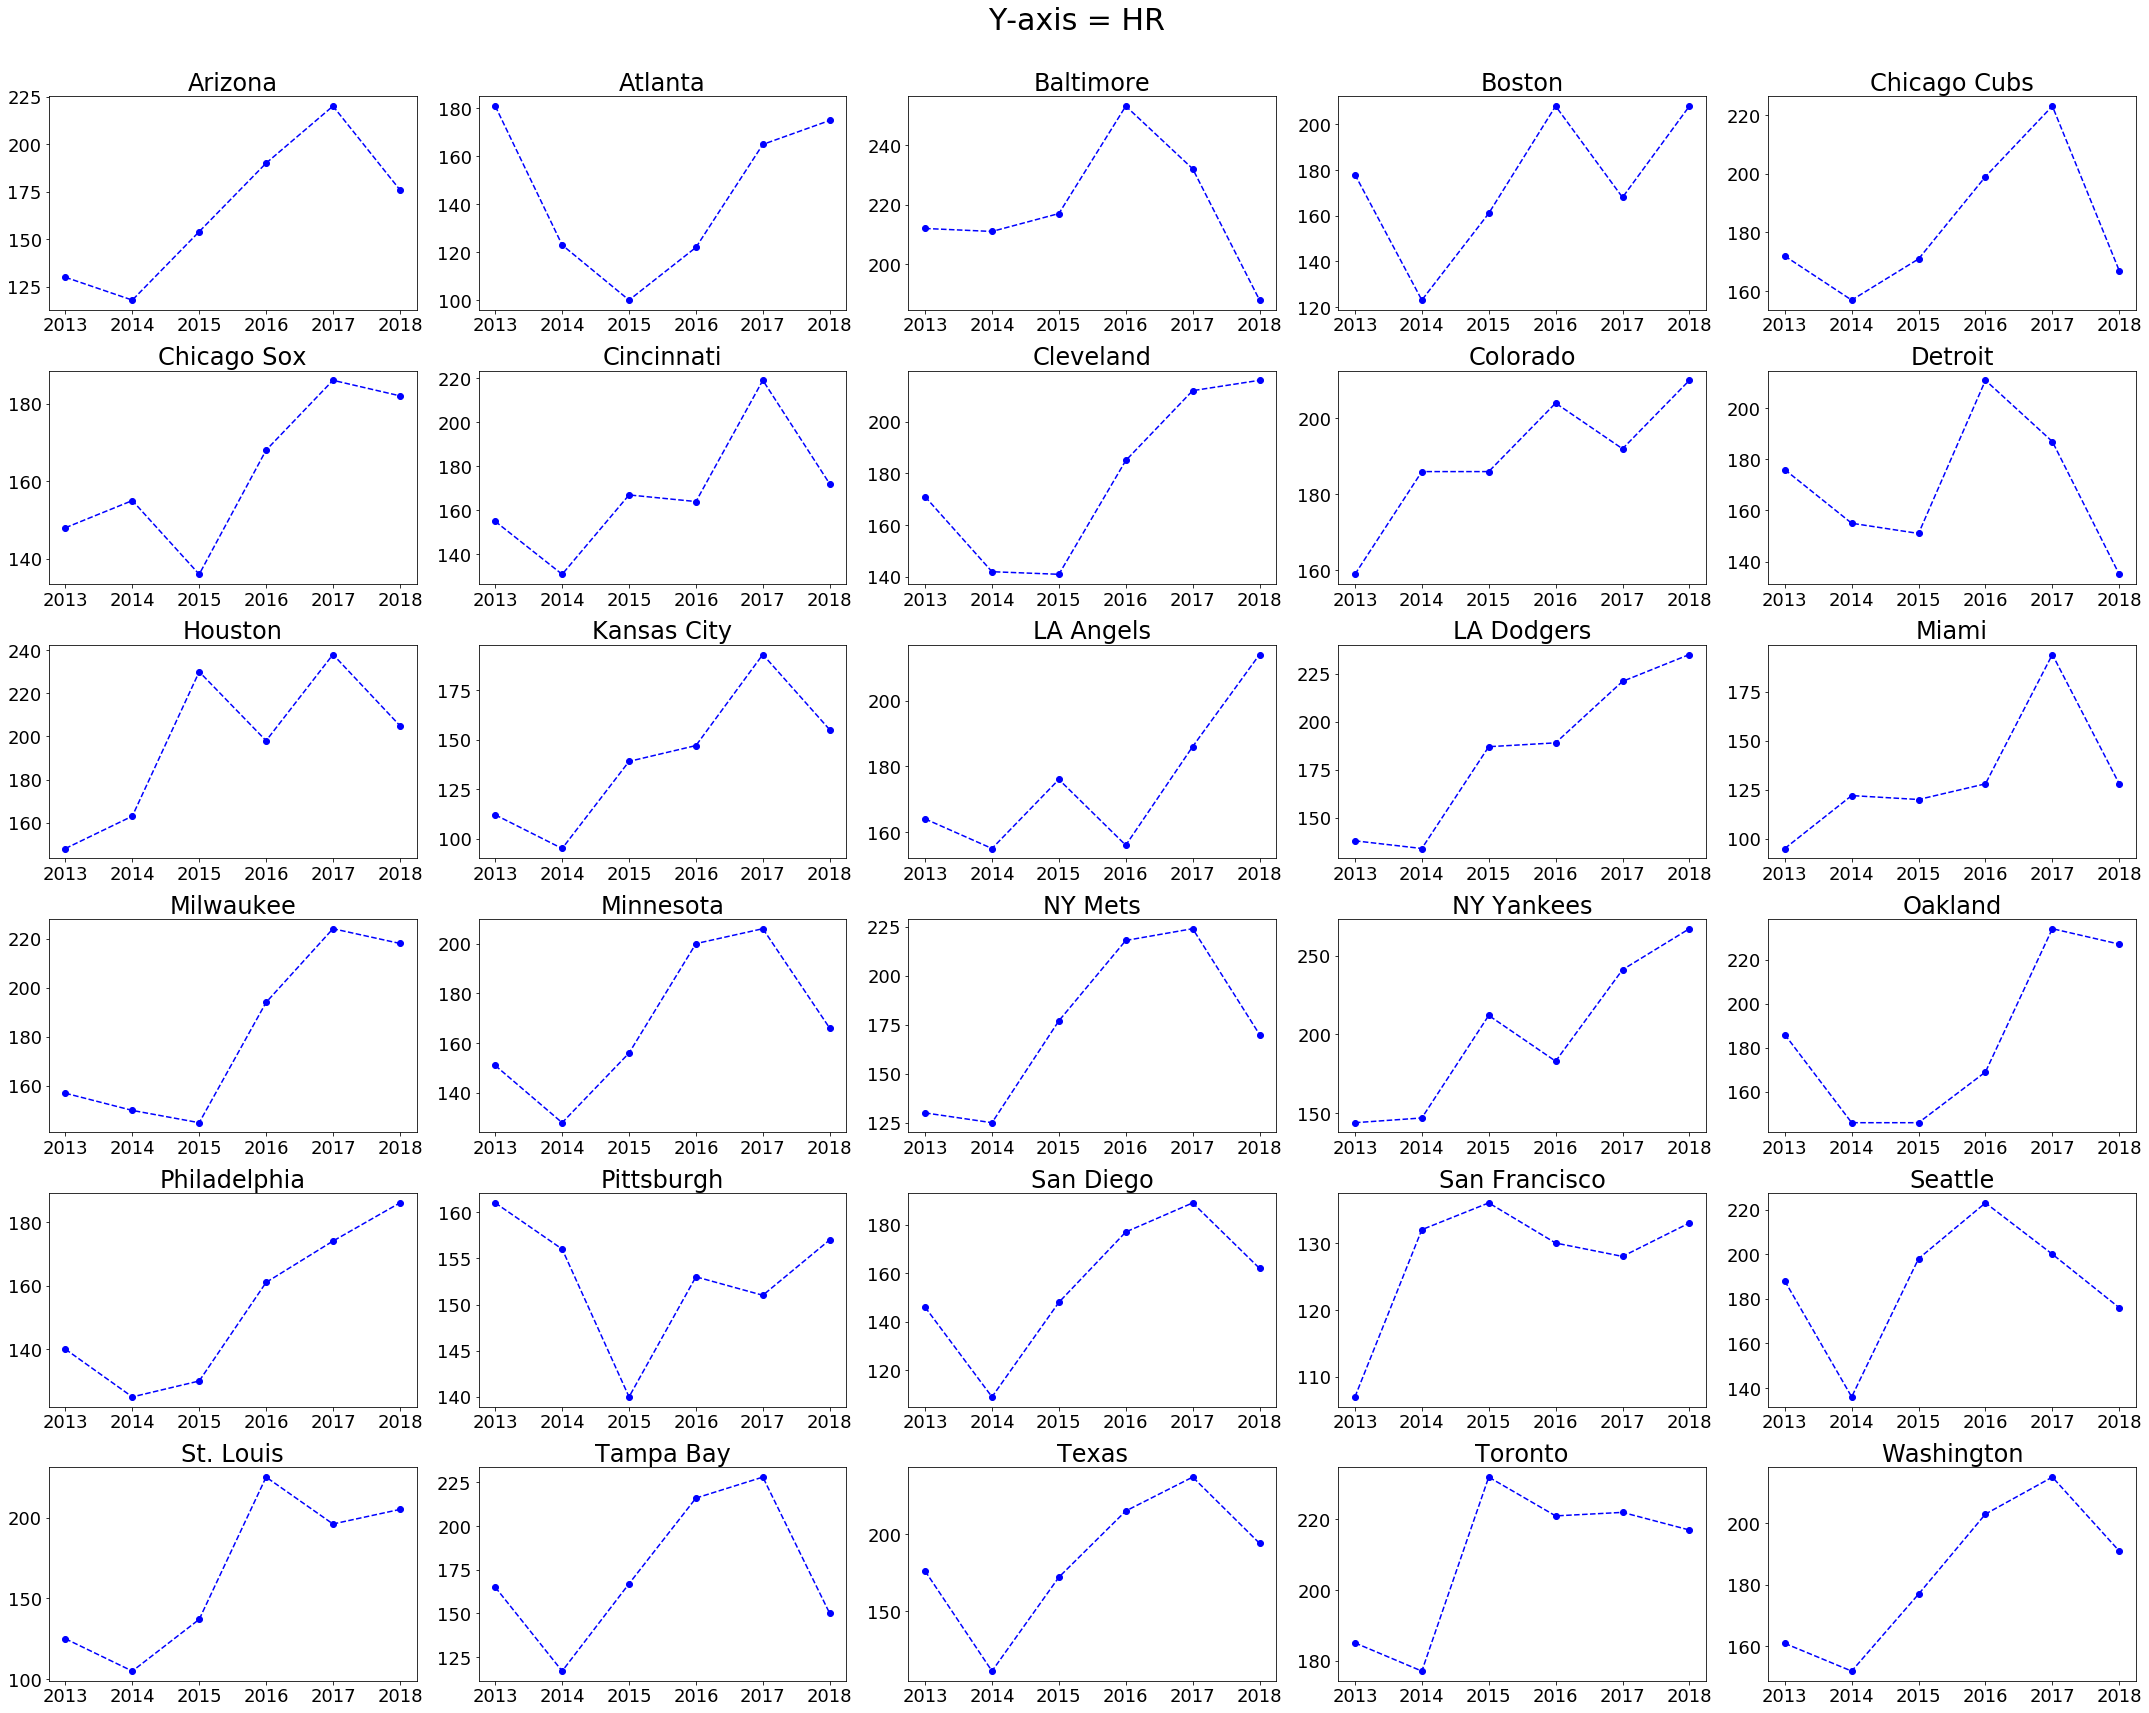

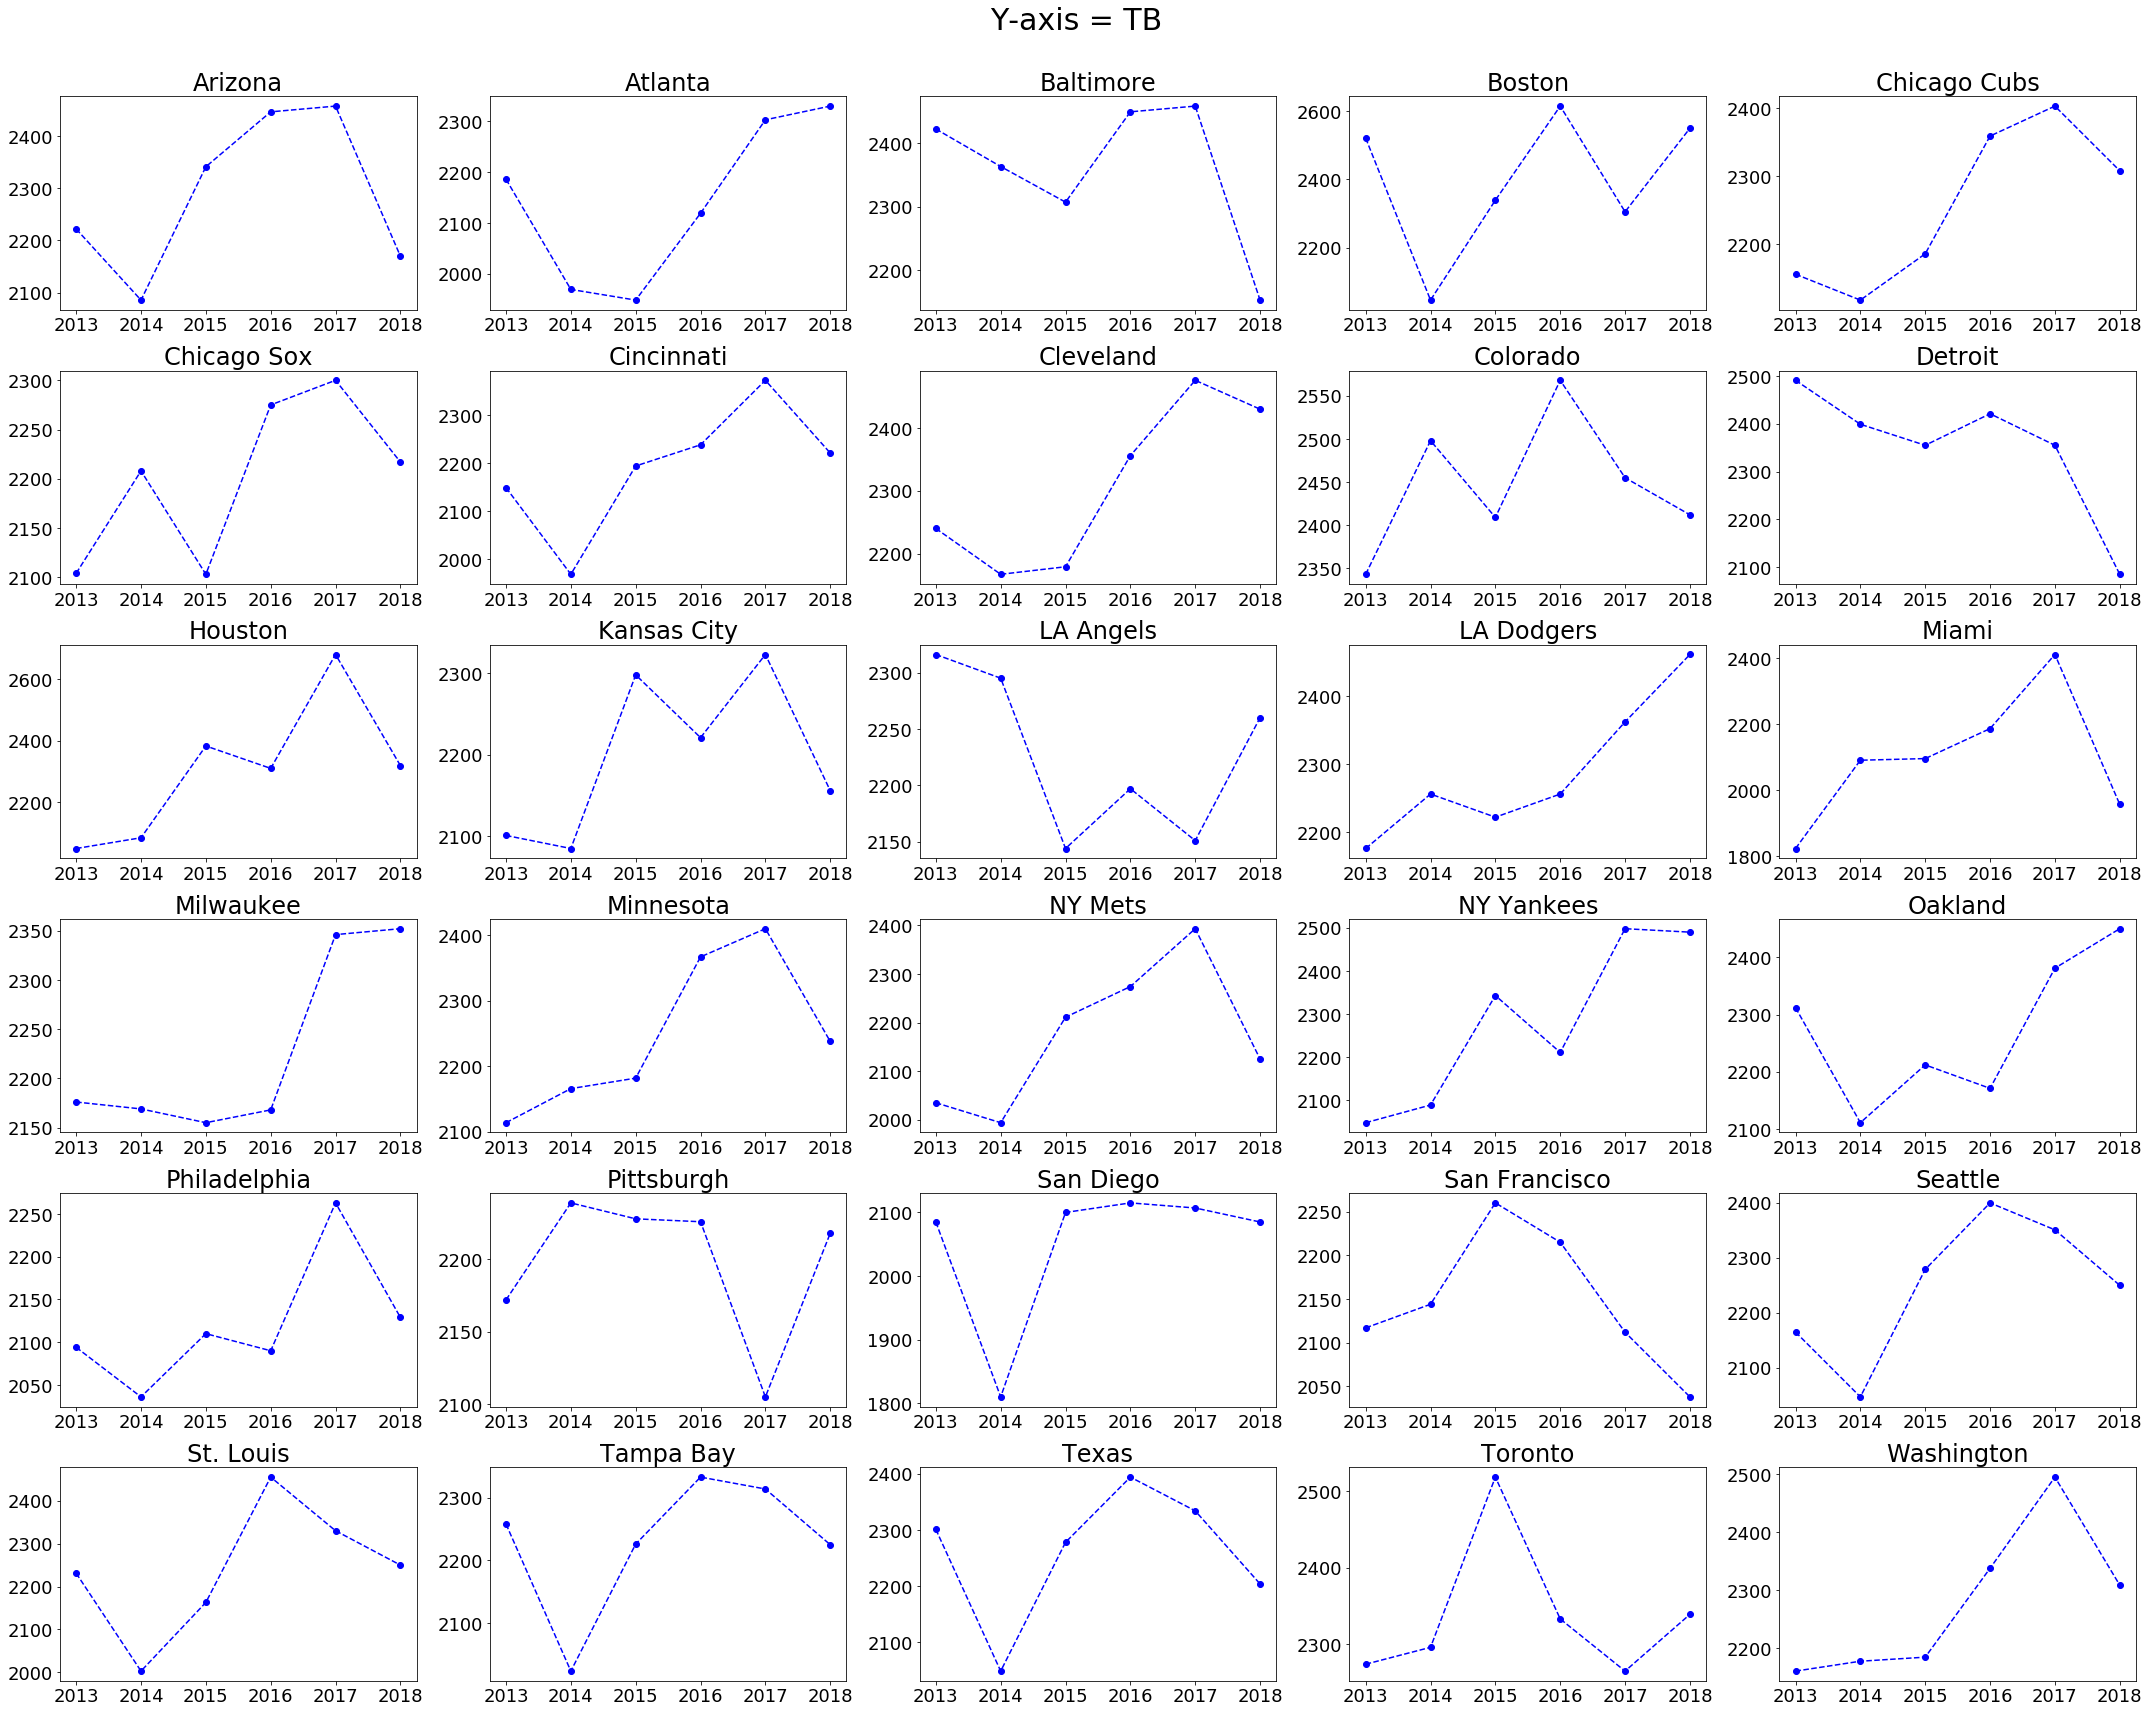

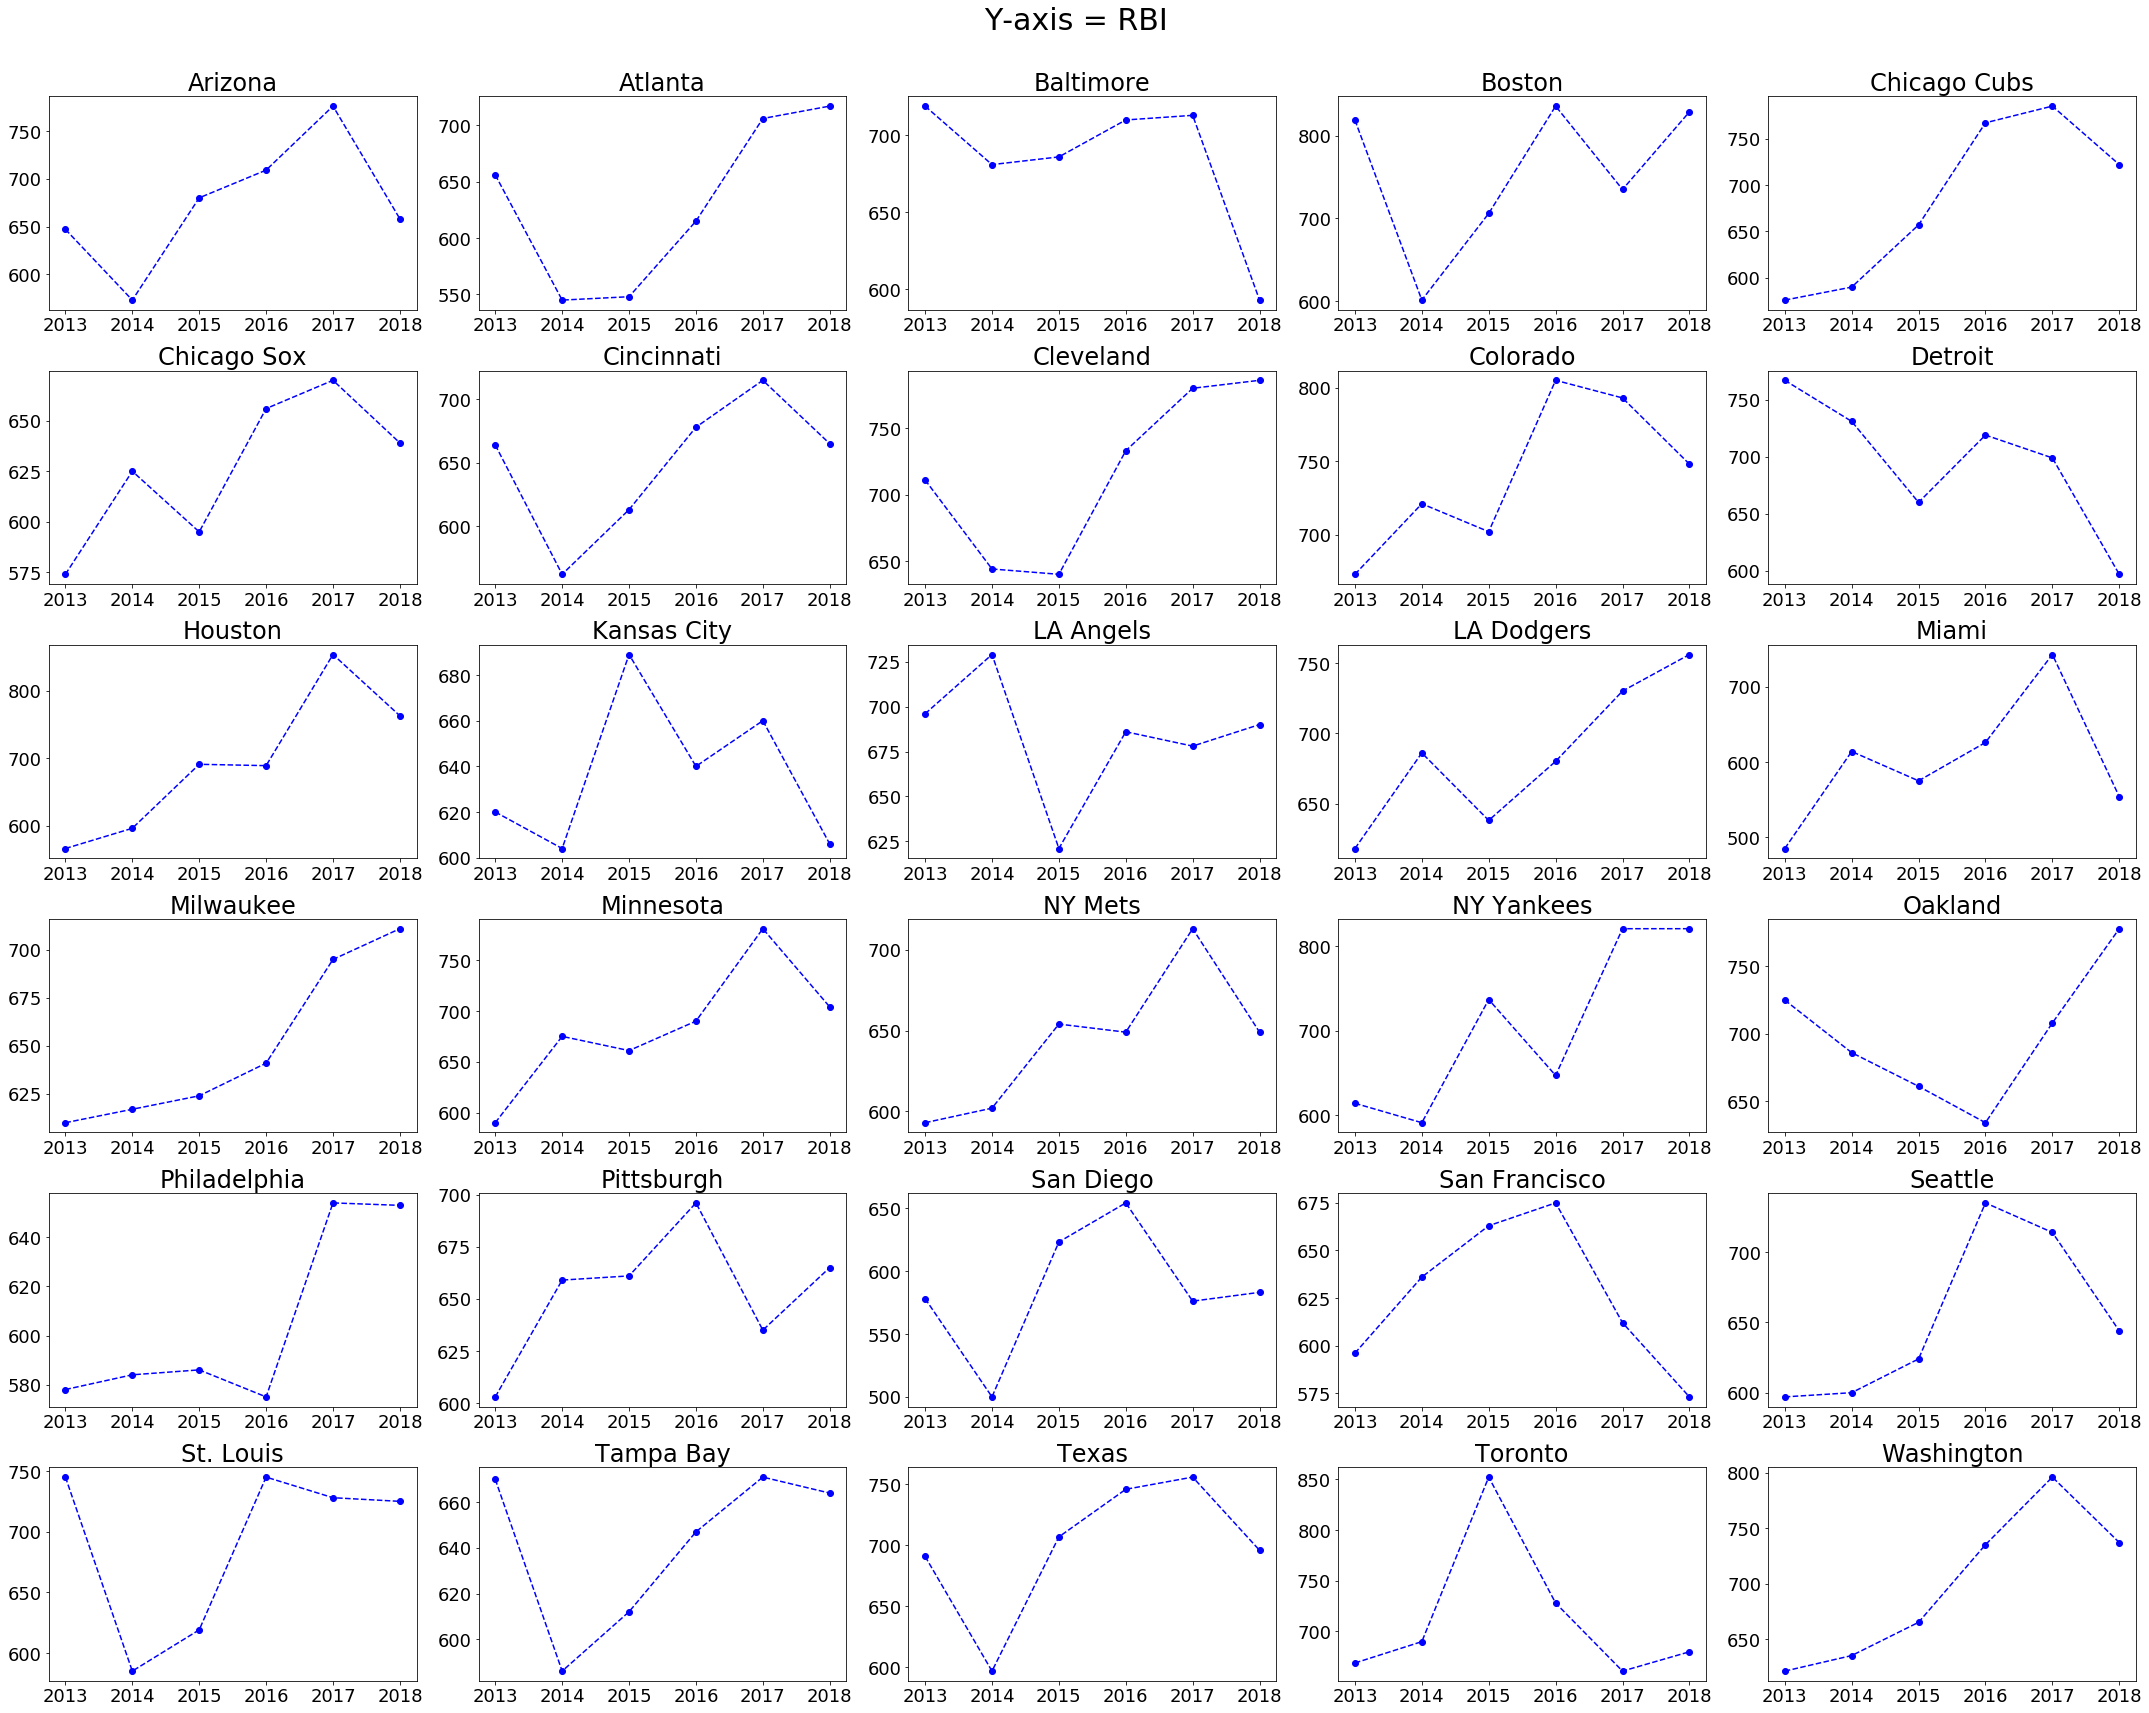

In [248]:
#test produce_plots_over_seasons
    
col_names = ['HR','TB','RBI']
produce_plots_over_seasons(combined_df, col_names)